<a href="https://colab.research.google.com/github/Mushtatoes/proj/blob/master/Pokemon_Types_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pokemon Types Analysis: 
**Description:** A project to work with pandas and matplotlib.pyplot

**Goal:** Create a simple chart on the distribution of pokemon type 1 from PokeAPI, automatically accounting for new additions to PokeAPI.


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import re

### Creating a list of the possible Pokemon Types:
- Use requests.get to pull PokeAPI json
- Use regex re.search to isolate type id
- Filter out non-standard types (id > 10000)

In [0]:
type_json = requests.get('https://pokeapi.co/api/v2/type/').json()

In [3]:
# Pull urls and names for each type
type_results = type_json['results']

# Capitalize names
def type_map(type_object):
  type_object['name'] = type_object['name'].capitalize()
  return type_object

type_name_url = list(map(type_map, type_results))

# Define filter function to remove non-standard types
def type_filter(type_object):
  type_match = re.search('^https://pokeapi\.co/api/v2/type/(\d+)/$', type_object['url'])
  if not type_match:
    return False
  return int(type_match.group(1)) <= 10000

type_data = list(filter(type_filter,type_name_url))

num_types = len(type_data)

print(type_data)
print(num_types)

[{'name': 'Normal', 'url': 'https://pokeapi.co/api/v2/type/1/'}, {'name': 'Fighting', 'url': 'https://pokeapi.co/api/v2/type/2/'}, {'name': 'Flying', 'url': 'https://pokeapi.co/api/v2/type/3/'}, {'name': 'Poison', 'url': 'https://pokeapi.co/api/v2/type/4/'}, {'name': 'Ground', 'url': 'https://pokeapi.co/api/v2/type/5/'}, {'name': 'Rock', 'url': 'https://pokeapi.co/api/v2/type/6/'}, {'name': 'Bug', 'url': 'https://pokeapi.co/api/v2/type/7/'}, {'name': 'Ghost', 'url': 'https://pokeapi.co/api/v2/type/8/'}, {'name': 'Steel', 'url': 'https://pokeapi.co/api/v2/type/9/'}, {'name': 'Fire', 'url': 'https://pokeapi.co/api/v2/type/10/'}, {'name': 'Water', 'url': 'https://pokeapi.co/api/v2/type/11/'}, {'name': 'Grass', 'url': 'https://pokeapi.co/api/v2/type/12/'}, {'name': 'Electric', 'url': 'https://pokeapi.co/api/v2/type/13/'}, {'name': 'Psychic', 'url': 'https://pokeapi.co/api/v2/type/14/'}, {'name': 'Ice', 'url': 'https://pokeapi.co/api/v2/type/15/'}, {'name': 'Dragon', 'url': 'https://pokeapi

### Filter out pokemon second type to only see Pokemon's first type:


In [4]:
type1_count = []

def pokemon_filter(type_object): 
  pokemonid_search = re.search('^https://pokeapi\.co/api/v2/pokemon/(\d+)/$',type_object['pokemon']['url'])
  if type_object['slot'] != 1: # slot 1 is first type
    return False
  if not pokemonid_search:
    return False
  return int(pokemonid_search.group(1)) <= 10000 # filter out pokemon id > 10000

url_list = [x['url'] for x in type_data]

for url in url_list:
  pokemon_json = requests.get(url).json()['pokemon']
  pokemon_f = list(filter(pokemon_filter, pokemon_json))
  type1_count.append(len(pokemon_f))

print(type1_count)

[105, 29, 3, 34, 32, 46, 72, 27, 24, 53, 114, 78, 40, 53, 23, 27, 29, 18]


### Organize pokemon into list of lists since the types are already in order:
Total validated below.

In [5]:
def basket_map(name_object, count_object):
  return [name_object['name'], count_object]

type1_basket = list(map(basket_map, type_data, type1_count))

print(type1_basket)
print('Total : ' + str(sum(type1_count)))

[['Normal', 105], ['Fighting', 29], ['Flying', 3], ['Poison', 34], ['Ground', 32], ['Rock', 46], ['Bug', 72], ['Ghost', 27], ['Steel', 24], ['Fire', 53], ['Water', 114], ['Grass', 78], ['Electric', 40], ['Psychic', 53], ['Ice', 23], ['Dragon', 27], ['Dark', 29], ['Fairy', 18]]
Total : 807


# Enter data into DataFrame:
DataFrame.loc[row_label, column_label], use .info() to gather labels

Insert pokemon type and number of pokemon into dataframe.

In [6]:
pokemon_df = pd.DataFrame({'Type': [x['name'] for x in type_data], 'Count': type1_count})
print(pokemon_df.to_string(index=False))

     Type  Count
   Normal    105
 Fighting     29
   Flying      3
   Poison     34
   Ground     32
     Rock     46
      Bug     72
    Ghost     27
    Steel     24
     Fire     53
    Water    114
    Grass     78
 Electric     40
  Psychic     53
      Ice     23
   Dragon     27
     Dark     29
    Fairy     18


### Use matplotlib.plt to plot the data onto a chart:
**Useful:**


plt.plot(x,y), plt.xticks(rotation)


plt.xlabel(),plt.ylabel(),plt.title()

Pokemon type html colors from: http://www.epidemicjohto.com/t882-type-colors-hex-colors

 #### Setting up chart visuals below and plotting final product:


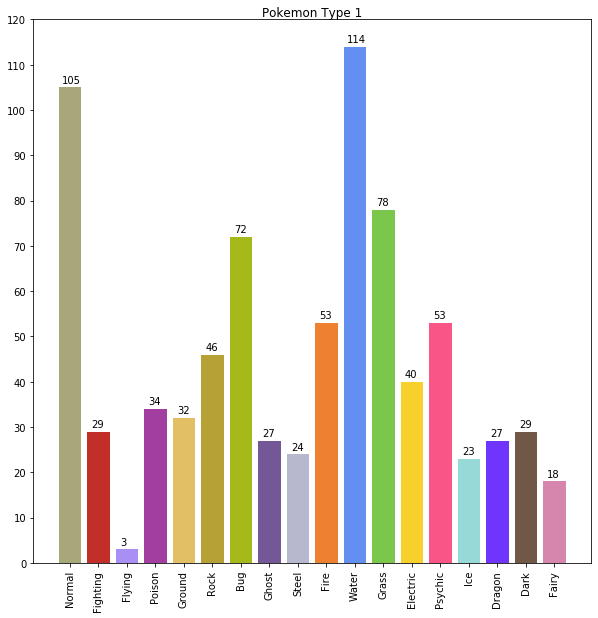

In [7]:
colors = ['#A8A77A','#C22E28','#A98FF3','#A33EA1','#E2BF65','#B6A136','#A6B91A','#735797','#B7B7CE','#EE8130','#6390F0','#7AC74C','#F7D02C','#F95587','#96D9D6','#6F35FC','#705746','#D685AD']

# Initialize
fig1, type1_chart = plt.subplots()

# Set up labels and axis
types = pokemon_df['Type']
counts = pokemon_df['Count']
x_pos = range(len(types))
y_pos = range(0, max(counts)+9, 10)

# Set up bar chart
type1_chart.bar(x_pos, counts, color = colors)
type1_chart.set_xticks(x_pos)
type1_chart.set_xticklabels(types, {'rotation': 'vertical'})
type1_chart.set_yticks(y_pos)

# Add text to show count on top of each bar
for i, v in enumerate(counts):
  if v > 99:
    plt.text(x_pos[i] - 0.30, v + 1, v)
  else:
    plt.text(x_pos[i] - 0.25, v + 1, v)

plt.title('Pokemon Type 1',fontdict = {'verticalalignment': 'top'})
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()